In [1]:
from wavefronts import *
from recons import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline
meters_to_ns = 1e9/c_light


### Load antenna coordinates and timings of events. Make sure to remove a time constant to avoid overflows

In [21]:
an = antenna_set('../Beacon/coord_antennas.txt')
an.coordinates -= an.coordinates.mean(axis=0)
#co = coincidence_set('../Beacon/Rec_coinctable_new.txt',an,t_offset=1714316877.)
co = coincidence_set('../Beacon/Rec_coinctable_new.txt',an)

 Reading antenna positions from file ../Beacon/coord_antennas.txt
 Reading coincidence(s): index, peak time, peak amplitude from file ../Beacon/Rec_coinctable_new.txt


### Compute angles using PWF loss global minimizer. Compute corresponding timings

In [22]:
predicted_times = np.zeros_like(co.peak_time_array)
centered_peak_times = np.copy(co.peak_time_array)
centered_predicted_times = np.zeros_like(co.peak_time_array)

angles = np.zeros((co.ncoincs,2))
for i in range(co.ncoincs):
    centered_peak_times[i,:co.nants[i]] = co.peak_time_array[i,:co.nants[i]] - co.peak_time_array[i,:co.nants[i]].mean()
    angles[i,:] = PWF_minimize_alternate_loss(co.antenna_coords_array[i,:co.nants[i],:],co.peak_time_array[i,:co.nants[i]])
    predicted_times[i,:co.nants[i]] = PWF_model(angles[i,:],co.antenna_coords_array[i,:co.nants[i],:])
    centered_predicted_times[i,:co.nants[i]] = predicted_times[i,:co.nants[i]] - predicted_times[i,:co.nants[i]].mean()


Text(0.5, 1.0, 'Coincidence number 4')

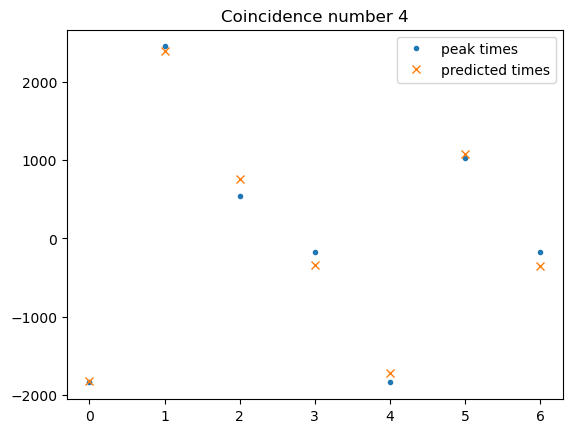

In [23]:
coinc = 4
plt.plot(meters_to_ns*centered_peak_times[coinc,:co.nants[coinc]],'.',label='peak times')
plt.plot(meters_to_ns*centered_predicted_times[coinc,:co.nants[coinc]],'x',label='predicted times')
plt.legend()
plt.title('Coincidence number %d'%coinc)

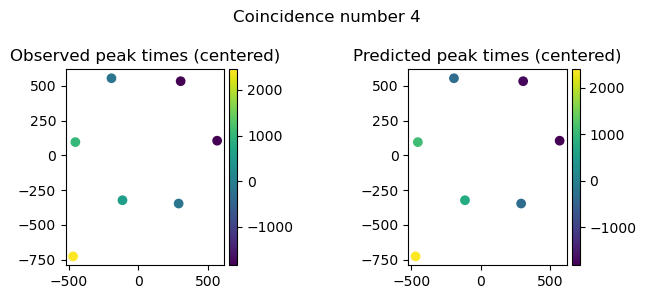

In [24]:
fig,axs = plt.subplots(1,2)
fig.set_figheight(3)
fig.set_figwidth(7)
#axs[0].set_box_aspect(1)
#axs[1].set_box_aspect(1)
pl0 = axs[0].scatter(co.antenna_coords_array[coinc,:co.nants[coinc],0],co.antenna_coords_array[coinc,:co.nants[coinc],1],c=meters_to_ns*centered_peak_times[coinc,:co.nants[coinc]])
axs[0].set_aspect('equal')
divider0 = make_axes_locatable(axs[0])
cax0 = divider0.append_axes("right", size="5%", pad=0.05)
fig.colorbar(pl0,cax=cax0)
axs[0].title.set_text('Observed peak times (centered)')

pl1 = axs[1].scatter(co.antenna_coords_array[coinc,:co.nants[coinc],0],co.antenna_coords_array[coinc,:co.nants[coinc],1],c=meters_to_ns*centered_predicted_times[coinc,:co.nants[coinc]])
axs[1].set_aspect('equal')
divider1 = make_axes_locatable(axs[1])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
fig.colorbar(pl1,cax=cax1)
axs[1].title.set_text('Predicted peak times (centered)')

fig.suptitle('Coincidence number %d'%coinc)
plt.tight_layout()


In [27]:
#angles[:,0]

Text(0.5, 1.0, 'Reconstructed beacon zenith, coincidence #4')

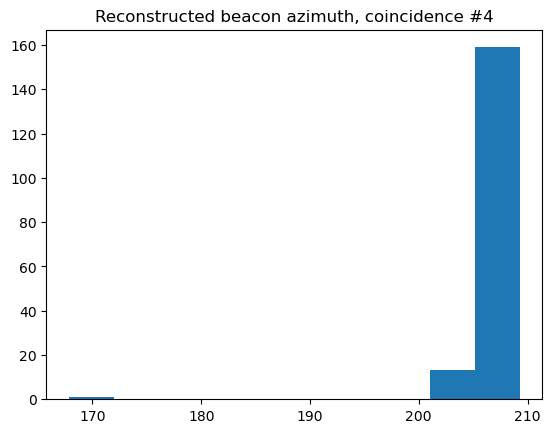

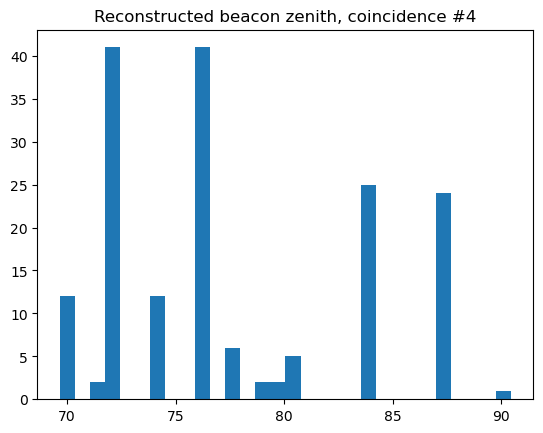

In [26]:
angles_deg = np.rad2deg(angles)
fig = plt.figure()
plt.hist(angles_deg[:,1])
plt.title('Reconstructed beacon azimuth, coincidence #%d'%coinc)
fig_zen = plt.figure()
plt.hist(angles_deg[:,0],bins=30)
plt.title('Reconstructed beacon zenith, coincidence #%d'%coinc)

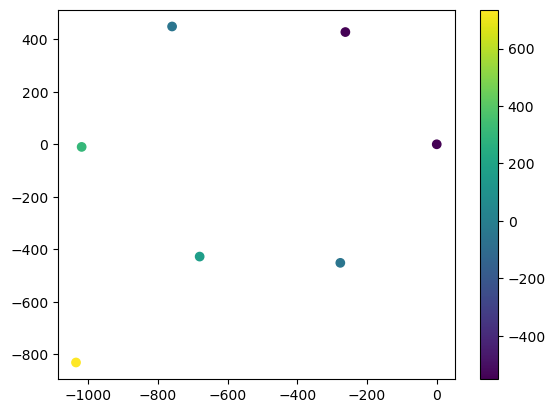

In [13]:
plt.scatter(co.antenna_coords_array[2,:co.nants[2],0],co.antenna_coords_array[2,:co.nants[2],1],c=centered_peak_times[2,:co.nants[2]])
plt.colorbar()

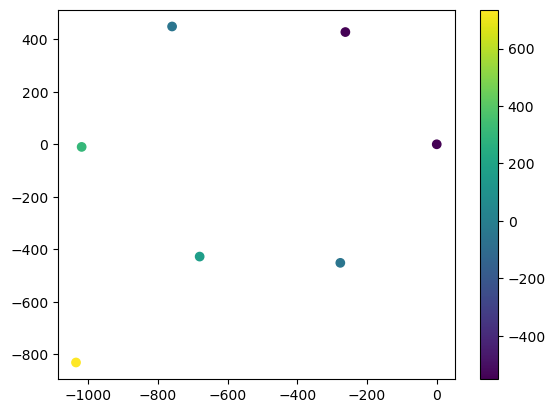

In [14]:
plt.scatter(co.antenna_coords_array[4,:co.nants[4],0],co.antenna_coords_array[4,:co.nants[4],1],c=centered_peak_times[4,:co.nants[4]])
plt.colorbar()

In [11]:
quatre = co.peak_time_array[4,:co.nants[4]]
quatre - quatre.mean()

array([-551.38699532,  735.18265915,  163.37392426,  -51.05435181,
       -551.38699532,  306.32610703,  -51.05435181])

In [ ]:
deux = co.peak_time_array[2,:co.nants[2]]
deux - deux.mean()

In [ ]:
arr=np.loadtxt('../Beacon/Rec_coinctable.txt')

In [ ]:
deux = arr[np.where(np.abs(arr[:,1]-2.)<1e-5)][:,2]
quatre = arr[np.where(np.abs(arr[:,1]-4.)<1e-5)][:,2]

In [ ]:
(deux-deux.mean() ) * 1e9

In [ ]:
(quatre-quatre.mean()) * 1e9

In [ ]:
deux-deux.mean()


In [ ]:
quatre-quatre.mean()

In [ ]:
an = antenna_set('../Beacon/coord_antennas.txt')
an.coordinates -= an.coordinates.mean(axis=0)
co = coincidence_set('../Beacon/Rec_coinctable_new.txt',an)

In [ ]:
co.peak_time_array

In [28]:
deux = co.peak_time_array[2,:]/c_light
deux - deux.mean()

array([ 1.02179391e-06, -1.83922904e-06,  5.44956752e-07, -1.70298986e-07,
       -1.83922904e-06, -1.70298986e-07,  2.45230538e-06])

In [29]:
quatre = co.peak_time_array[4,:]/c_light
quatre - quatre.mean()

array([-1.83922904e-06,  2.45230539e-06,  5.44956754e-07, -1.70298986e-07,
       -1.83922904e-06,  1.02179391e-06, -1.70298986e-07])